In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("cleaned_data.csv") 

In [3]:
# X ve y
X = df.drop(columns=['class'])
y = df['class']

# Train-test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (İsteğe bağlı) Scaling – RF gerektirmez ama tutarlılık için yapılabilir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Model
rf = RandomForestClassifier(random_state=42)

# Parametre aralığı
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# En iyi model
best_rf = grid.best_estimator_


In [5]:
y_pred = best_rf.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[481  85  36   6]
 [ 40 427 133  50]
 [ 25  92 413 146]
 [  3   6 100 546]]

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.79      0.83       608
           2       0.70      0.66      0.68       650
           3       0.61      0.61      0.61       676
           4       0.73      0.83      0.78       655

    accuracy                           0.72      2589
   macro avg       0.73      0.72      0.72      2589
weighted avg       0.72      0.72      0.72      2589



In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.7211


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.88      0.79      0.83       608
           2       0.70      0.66      0.68       650
           3       0.61      0.61      0.61       676
           4       0.73      0.83      0.78       655

    accuracy                           0.72      2589
   macro avg       0.73      0.72      0.72      2589
weighted avg       0.72      0.72      0.72      2589



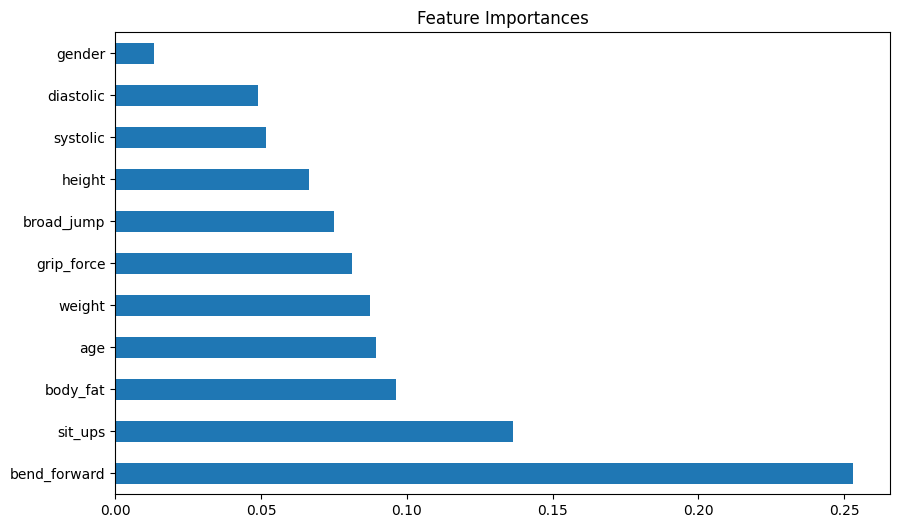

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

importances = best_rf.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_importance.plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances")
plt.show()
plt.savefig("feature_importances_graphic.jpg", format='jpg', dpi=1000)

